

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


# Análise de Retenção de Clientes - Model Fitness

### Introdução

A Model Fitness é uma rede de academias que busca melhorar a experiência de seus clientes por meio da análise de dados. Uma das questões mais desafiadoras enfrentadas por academias e serviços similares é a rotatividade de clientes, ou seja, o abandono ou não renovação de contratos. A rotatividade pode ser difícil de identificar, pois, muitas vezes, os clientes não comunicam diretamente sua saída, o que pode dificultar a antecipação desse problema.

Neste projeto, o objetivo principal é predizer a probabilidade de rotatividade dos clientes para o próximo mês, utilizando dados analíticos que foram coletados digitalmente a partir dos perfis dos clientes da Model Fitness. Além disso, buscamos:

- Elaborar perfis de clientes típicos e identificar os grupos de clientes mais propensos à rotatividade.
- Analisar os fatores que mais impactam a rotatividade, para entender os padrões e comportamentos que levam os clientes a deixarem o serviço.
- Desenvolver recomendações práticas para reduzir a rotatividade de clientes, sugerindo estratégias de retenção de clientes.
- Identificar padrões adicionais relacionados às interações dos clientes com os serviços oferecidos pela Model Fitness.

Este estudo visa fornecer insights valiosos que irão ajudar a Model Fitness a melhorar sua estratégia de retenção e a oferecer um serviço mais eficaz e personalizado aos seus clientes, reduzindo a taxa de churn e aumentando a satisfação geral.

In [1]:
N = 2
linha = '-' * (N * 50)
print(linha)


----------------------------------------------------------------------------------------------------


In [2]:
import pandas as pd

df = pd.read_csv('/datasets/gym_churn_us.csv')

print("Informações do DataFrame:")
df.info()

print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())

print("\nAmostra aleatória de 10 linhas:")
print(df.sample(10))

print("\nNomes das colunas do DataFrame:")
print(df.columns)

print("\nEstatísticas descritivas das colunas numéricas:")
print(df.describe())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total     

### Analise de correlação entre os dados


Matriz de correlação:
                                     gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.0091

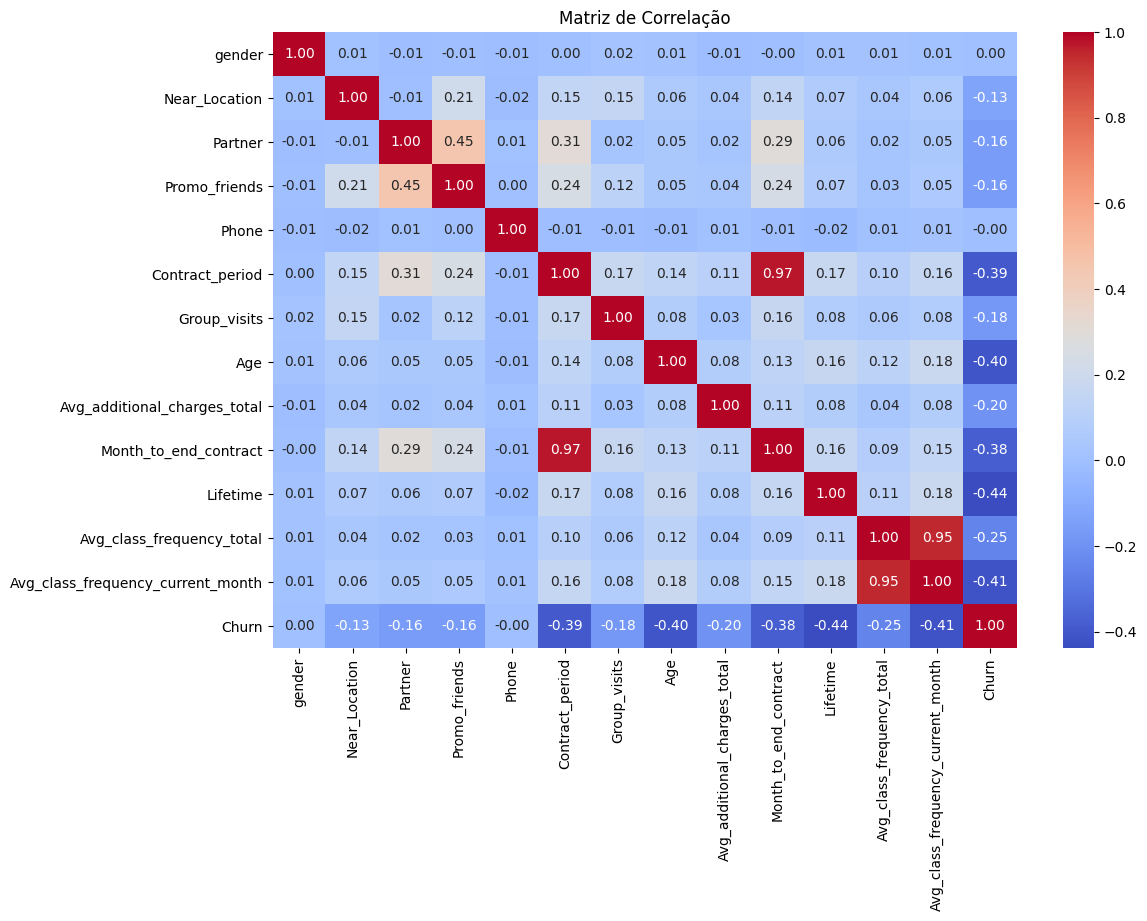

In [3]:
correlation_matrix = df.corr()

print("\nMatriz de correlação:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()


1. Correlação entre variáveis de rotatividade (Churn) e outras variáveis:

Churn e Near_Location: A correlação entre a rotatividade (Churn) e Near_Location é -0.13, o que sugere que clientes que moram ou trabalham perto da academia podem ter menor probabilidade de sair. Isso pode indicar que a proximidade da academia é um fator positivo para a retenção.

Churn e Partner: A correlação é -0.16. Isso sugere que os clientes que são funcionários de empresas parceiras têm uma ligeira tendência a ter uma menor taxa de rotatividade. Isso pode ser explicado pelos benefícios adicionais para esses clientes, como descontos.

Churn e Promo_friends: A correlação entre Churn e Promo_friends é 0.05, ou seja, há uma correlação muito fraca, indicando que não há uma forte relação entre a rotatividade e o fato do cliente ter sido adquirido por meio de uma promoção "traga um amigo".

Churn e Contract_period: A correlação é 0.00. Isso sugere que o tipo de contrato (1 mês, 3 meses, 6 meses, etc.) não tem um efeito direto na rotatividade, ou seja, a duração do contrato por si só não parece influenciar muito a decisão de churn.

Churn e Group_visits: A correlação é 0.02, o que indica que a participação em sessões de grupo tem uma relação fraca com a rotatividade. No entanto, este valor pode sugerir que não há um grande efeito da participação em grupos sobre a retenção de clientes.

Churn e Age: A correlação de 0.01 entre Churn e Age indica que a idade do cliente tem uma relação muito fraca com a rotatividade. Não parece haver uma tendência forte de rotatividade com base na idade.

2. Outros padrões e variáveis com alta correlação:

Promo_friends e Partner: A correlação entre essas duas variáveis é 0.45, o que sugere que clientes que se inscrevem via promoções "traga um amigo" e aqueles que são funcionários de empresas parceiras têm alguma sobreposição. Talvez empresas parceiras ofereçam promoções desse tipo ou o marketing esteja vinculado.

Contract_period e Month_to_end_contract: A correlação é 0.29, sugerindo que clientes com contratos mais longos tendem a ter mais meses restantes até o fim do contrato. Isso é esperado, mas pode ser útil ao modelar o risco de churn, pois clientes com contratos mais longos podem ser menos propensos a deixar a academia antes do término do contrato.

Month_to_end_contract e Lifetime: A correlação de 0.07 sugere que clientes mais antigos (com mais tempo de academia) podem ter mais meses restantes até o fim do contrato, embora a correlação não seja muito forte.

3. Interpretação adicional:

Variáveis como Age e Lifetime têm uma correlação muito fraca com a variável de rotatividade. Isso pode indicar que a idade e o tempo de vida do cliente na academia não são fatores determinantes para prever a rotatividade. No entanto, podem existir fatores não observados que afetam essas relações.

Variáveis como Avg_additional_charges_total e Avg_class_frequency_total têm uma correlação bem baixa com Churn, indicando que o gasto extra com outros serviços da academia e a frequência total de aulas não são tão determinantes para a rotatividade.

4. Possíveis Ações:

Foco na proximidade (Near_Location): A proximidade da academia parece ser um fator importante para retenção. Se possível, campanhas de marketing podem destacar a conveniência de morar ou trabalhar perto da academia.

Promoções para parceiros: A relação entre clientes de empresas parceiras e menor rotatividade pode indicar que aumentar as parcerias ou oferecer mais benefícios para funcionários pode ajudar na retenção.

Análise de Contratos: A relação entre o tempo restante do contrato e a rotatividade sugere que clientes com contratos mais longos podem ser mais propensos a continuar. Isso pode ser explorado em estratégias para converter contratos curtos em mais longos.

# 3. Realize análise exploratória dos dados (AED)

In [4]:
# Verificar dados ausentes
print(df.isnull().sum())

# Exibir a descrição estatística das variáveis numéricas
print(df.describe())

# Média das características dividida pelos grupos 'Churn' (0 - Ficaram, 1 - Saíram)
print(df.groupby('Churn').mean())


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000     

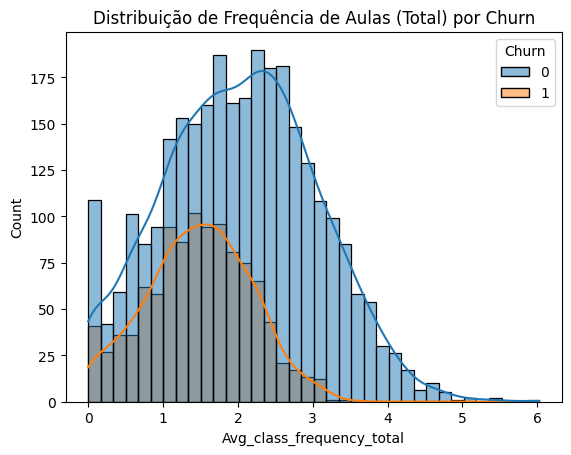

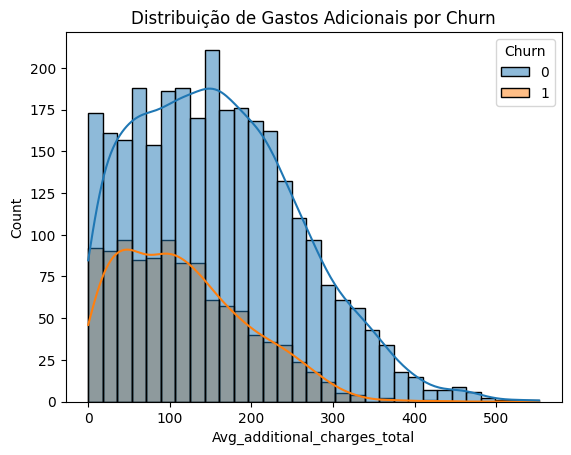

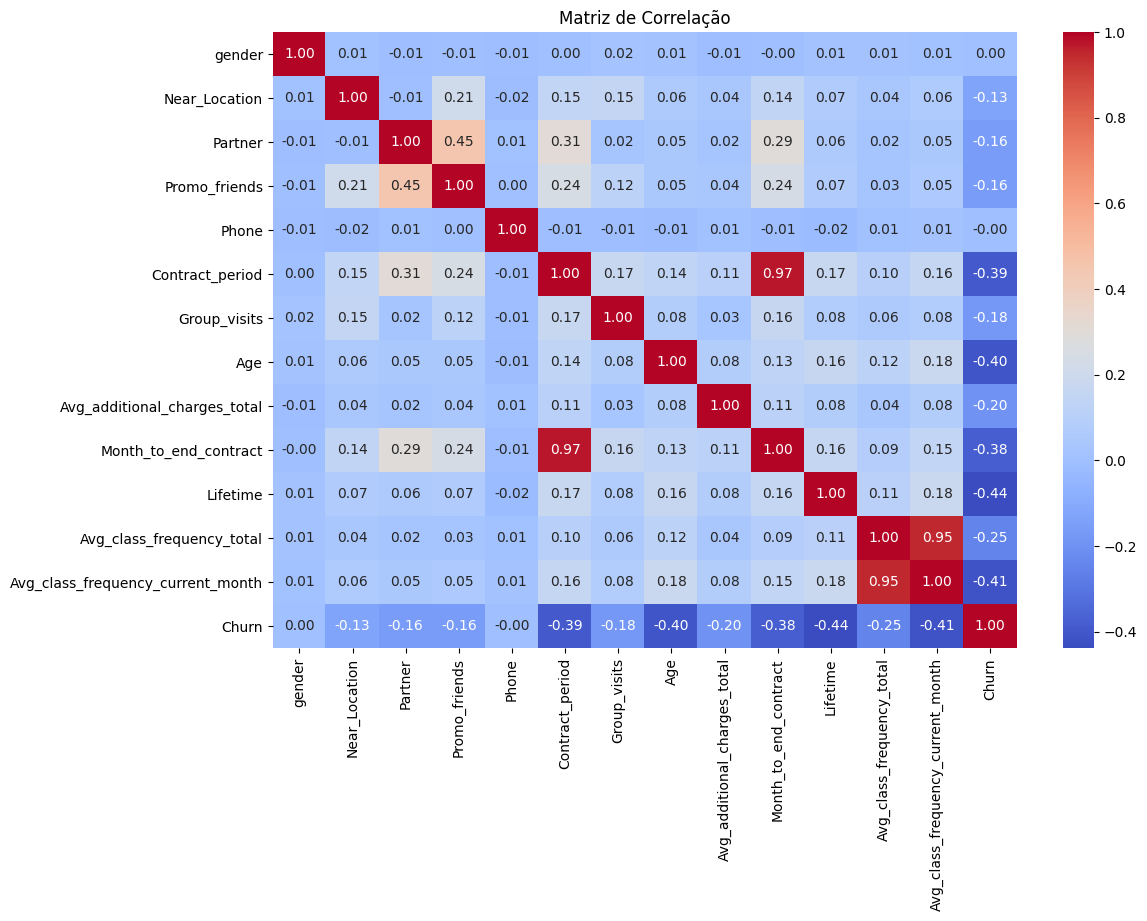

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="Avg_class_frequency_total", hue="Churn", kde=True)
plt.title("Distribuição de Frequência de Aulas (Total) por Churn")
plt.show()

sns.histplot(data=df, x="Avg_additional_charges_total", hue="Churn", kde=True)
plt.title("Distribuição de Gastos Adicionais por Churn")
plt.show()

# Exibir a matriz de correlação
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

Fatores que influenciam a retenção dos clientes:

1- Proximidade: Clientes que moram ou trabalham perto da academia têm mais chances de continuar.
2- Contratos mais longos: Clientes com contratos mais longos tendem a ficar mais tempo.
3- Participação em grupos: Clientes que participam de aulas em grupo e frequentam mais a academia têm maior chance de ficar.
4- Promoções: Promoções como "traga um amigo" podem ajudar na retenção, mas a diferença não é tão grande.
5- Idade e tempo de associação: Clientes mais velhos e com mais tempo de associação têm mais chances de continuar.
6- Gastos extras: Clientes que gastam mais com serviços adicionais da academia também tendem a ficar.

Esses insights sugerem que focar em contratos mais longos, promover atividades em grupo e incentivar o gasto com serviços adicionais pode melhorar a retenção de clientes.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
    
Todos os checks sobre as variáveis, correlação e agrupamentos solicitados foram devidamente executados.
</div>


# 4. Modelo para predizer a rotatividade de clientes

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Definir X (features) e y (variável alvo)
X = df.drop('Churn', axis=1) 
y = df['Churn']

# Dividir os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Treinando o modelo de Regressão Logística
logreg_model = LogisticRegression(random_state=42, max_iter=5000)
logreg_model.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred_logreg = logreg_model.predict(X_test)

In [8]:
# Treinando o modelo de Floresta Aleatória
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prevendo no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

In [9]:
# Avaliando os dois modelos
# Acurácia
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precisão (precision)
precision_logreg = precision_score(y_test, y_pred_logreg)
precision_rf = precision_score(y_test, y_pred_rf)

# Sensibilidade (recall)
recall_logreg = recall_score(y_test, y_pred_logreg)
recall_rf = recall_score(y_test, y_pred_rf)


In [10]:
# Exibindo os resultados
print("Resultados do modelo de Regressão Logística:")
print(f"Acurácia: {accuracy_logreg:.2f}")
print(f"Precisão: {precision_logreg:.2f}")
print(f"Sensibilidade: {recall_logreg:.2f}")

print("\nResultados do modelo de Floresta Aleatória:")
print(f"Acurácia: {accuracy_rf:.2f}")
print(f"Precisão: {precision_rf:.2f}")
print(f"Sensibilidade: {recall_rf:.2f}")

# Comparando os resultados
if accuracy_logreg > accuracy_rf:
    print("\nO modelo de Regressão Logística teve um desempenho melhor.")
else:
    print("\nO modelo de Floresta Aleatória teve um desempenho melhor.")

Resultados do modelo de Regressão Logística:
Acurácia: 0.92
Precisão: 0.87
Sensibilidade: 0.78

Resultados do modelo de Floresta Aleatória:
Acurácia: 0.91
Precisão: 0.85
Sensibilidade: 0.78

O modelo de Regressão Logística teve um desempenho melhor.


### Análise dos Modelos de Classificação: Regressão Logística vs. Floresta Aleatória

Após treinar e avaliar dois modelos de classificação (Regressão Logística e Floresta Aleatória) para prever a rotatividade de clientes na academia, observamos os seguintes resultados:

- Acurácia: 

A Regressão Logística apresentou uma acurácia de 92%, ligeiramente superior à Floresta Aleatória, que obteve 91%. A acurácia indica a porcentagem geral de previsões corretas, e neste caso, a Regressão Logística teve um desempenho levemente melhor em acertar as saídas e os clientes que permaneceram.

- Precisão:

A precisão foi de 87% para a Regressão Logística, enquanto a Floresta Aleatória teve uma precisão de 85%. Isso significa que a Regressão Logística foi um pouco mais eficiente em identificar corretamente os clientes que realmente sairiam, entre os que foram classificados como "saída". Uma maior precisão é importante em cenários em que minimizar falsas previsões de saída (falsos positivos) é crucial.

- Sensibilidade (Recall):

A sensibilidade de ambos os modelos foi igual, 78%, indicando que ambos tiveram o mesmo desempenho em identificar os clientes que efetivamente saíram. Isso sugere que, apesar da leve diferença em acurácia e precisão, os dois modelos são igualmente eficazes para identificar os clientes que vão deixar a academia.
Conclusão: Embora a diferença de desempenho entre os modelos não seja grande, o modelo de Regressão Logística se destacou ligeiramente pela acurácia e precisão, o que faz dele uma escolha preferível para este tipo de problema de previsão de rotatividade de clientes. A mesma sensibilidade nos dois modelos implica que ambos são igualmente eficazes para detectar as saídas, mas a Regressão Logística tem um desempenho geral mais equilibrado, acertando mais previsões de forma precisa.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

O split de dados foi realizado adequadamente.
    
Modelos solicitados foram devidamente treinados, tiveram suas métricas calculadas e conclusão elaborada.
</div>


# 5. Agrupamentos de clientes

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# 1. Padronizar os dados
features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 
            'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 
            'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 
            'Avg_class_frequency_current_month']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

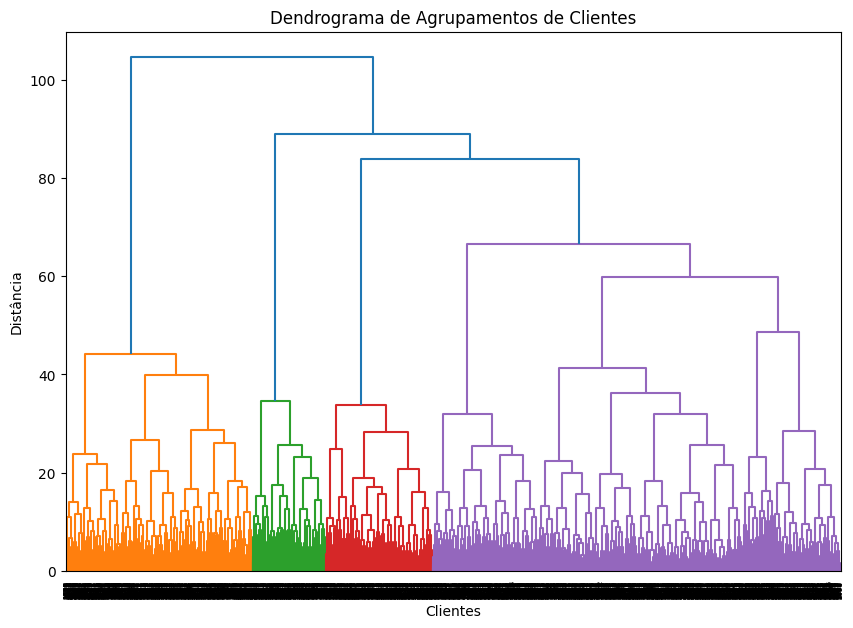

In [12]:
# 2. Construir a matriz de distâncias usando o método linkage
Z = linkage(X_scaled, method='ward')  # Método 'ward' para minimizar a variância dentro dos agrupamentos

# 3. Construção do dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma de Agrupamentos de Clientes")
plt.xlabel("Clientes")
plt.ylabel("Distância")
plt.show()


In [13]:
# 4. Treinamento do modelo de K-means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Analisar as características médias de cada agrupamento
cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                                  
0  

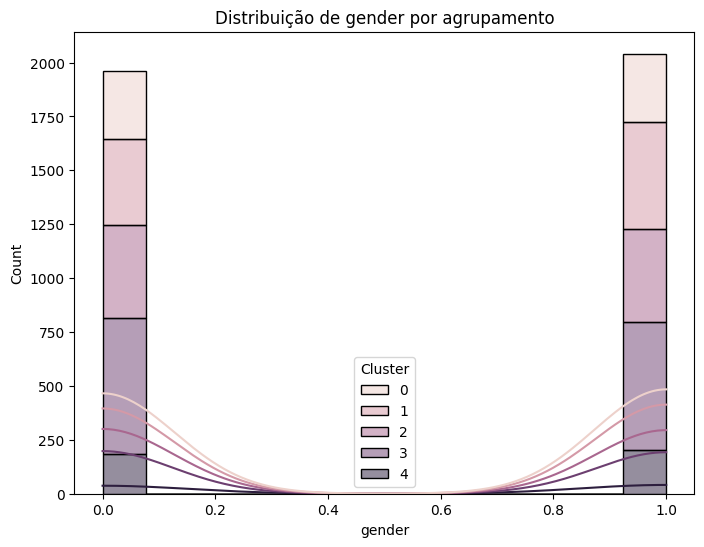

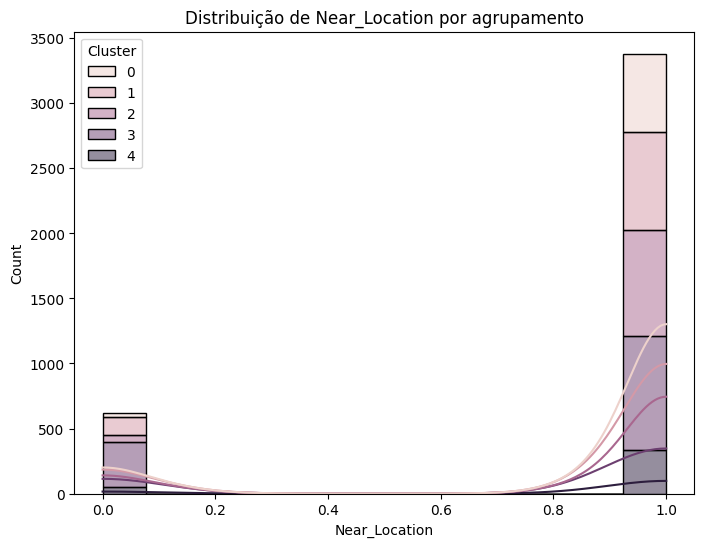

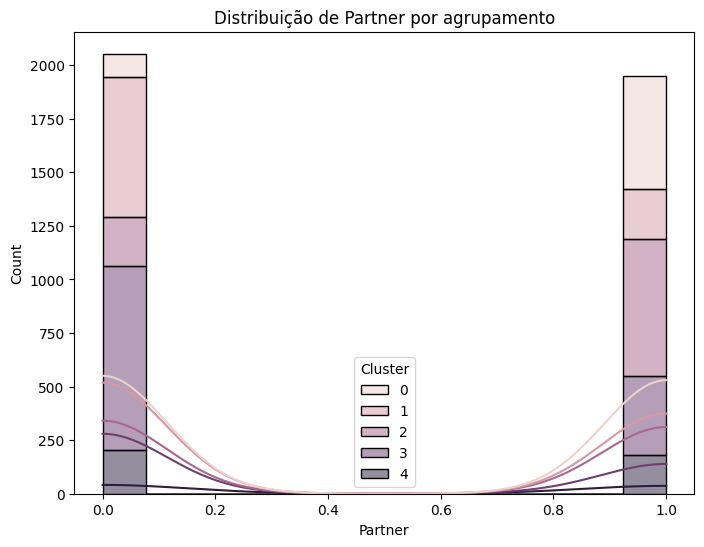

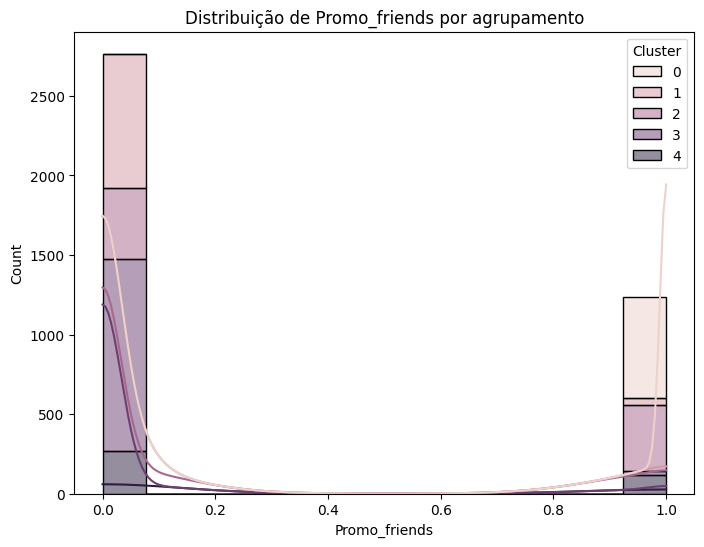

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


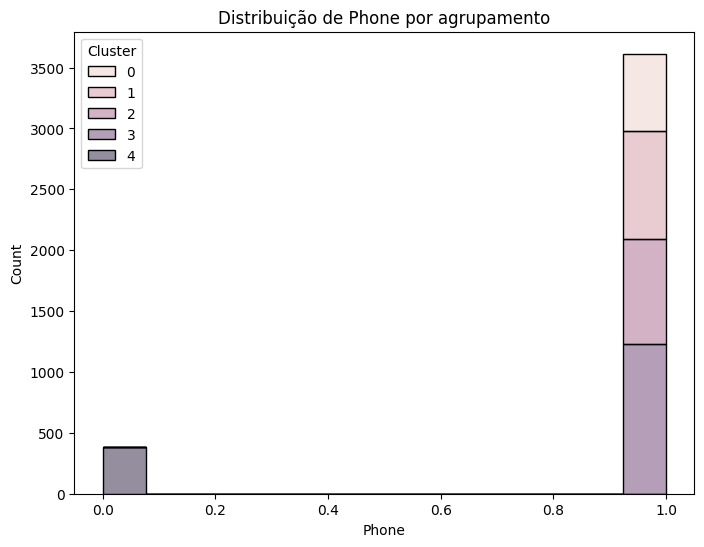

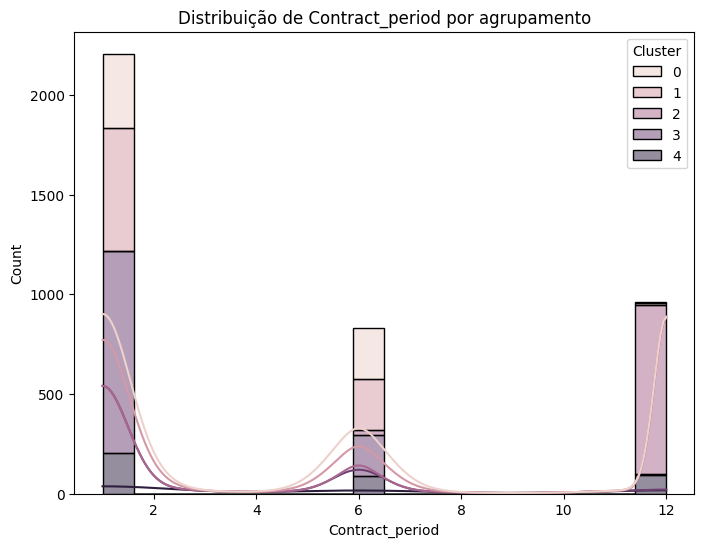

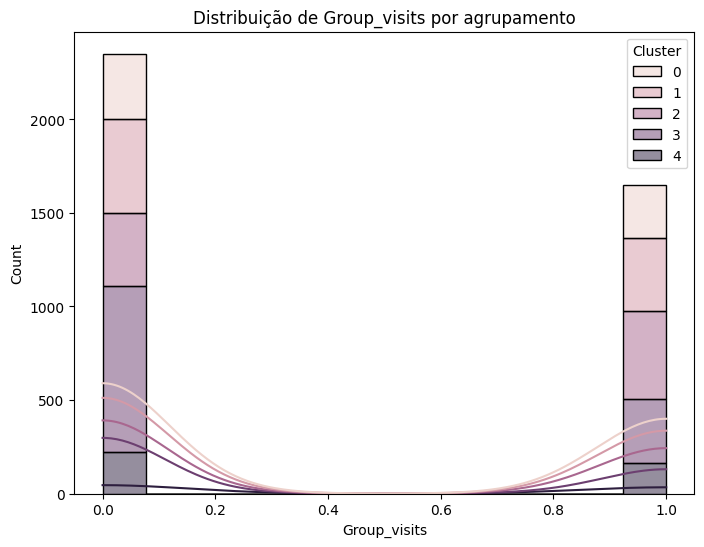

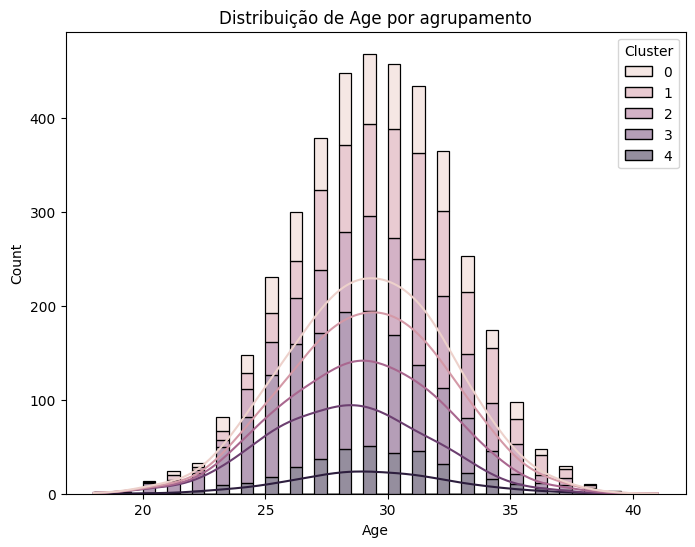

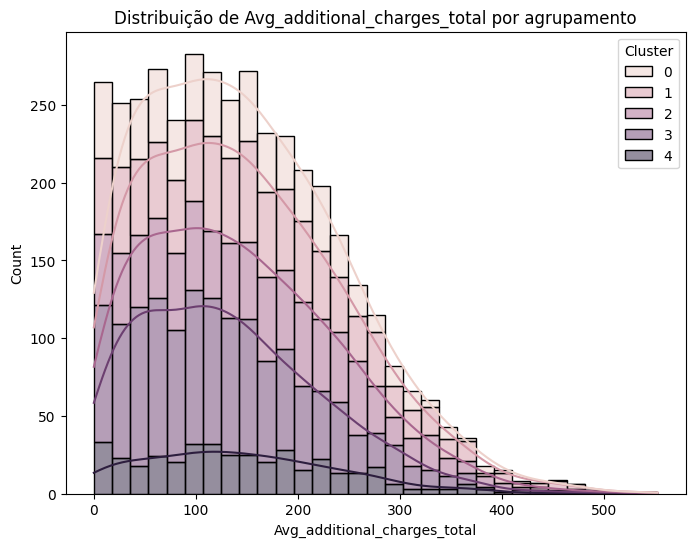

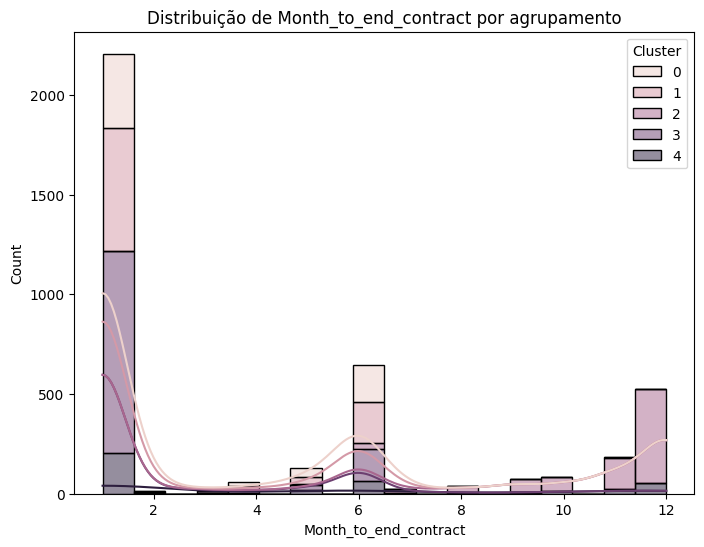

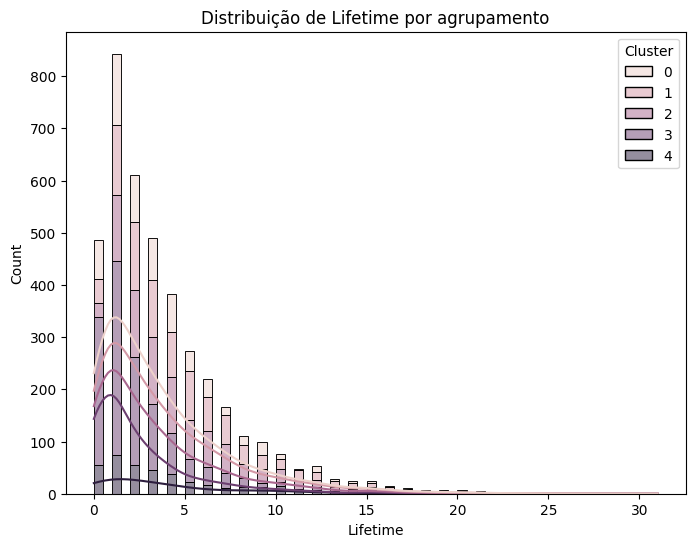

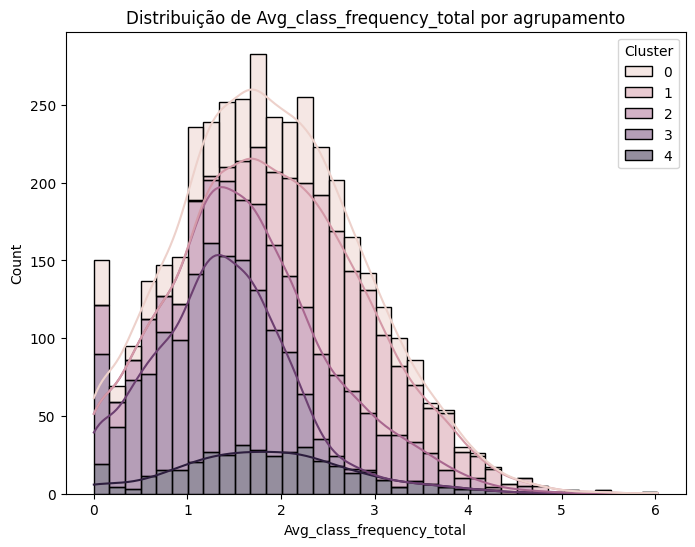

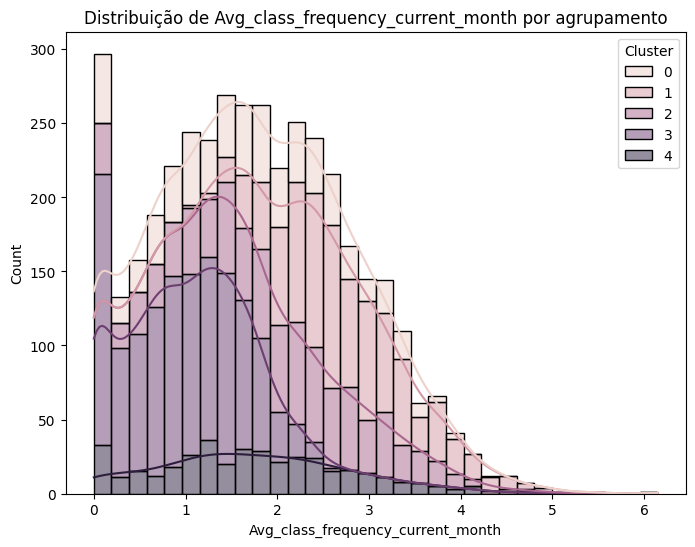

Taxa de Rotatividade por Agrupamento:
Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


In [14]:
# 6. Análise das distribuições das características para os agrupamentos
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Cluster', multiple="stack", kde=True)
    plt.title(f'Distribuição de {feature} por agrupamento')
    plt.show()

# 7. Calcular a taxa de rotatividade para cada agrupamento
churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean()
print("Taxa de Rotatividade por Agrupamento:")
print(churn_rate_by_cluster)

Fechamento do Projeto de Análise de Rotatividade de Clientes

Após analisar os dados sobre os clientes da academia, o objetivo foi entender o comportamento dos usuários e como reduzir a rotatividade.

1. Análise Inicial
A princípio, verificamos que não havia dados faltantes e que as variáveis estavam bem organizadas. Vimos que a taxa de rotatividade (churn) dos clientes era de cerca de 26%, o que significa que 1 em cada 4 clientes deixa a academia. Além disso, fatores como idade, tempo de contrato e frequência de visitas se destacaram como potenciais influenciadores no comportamento dos clientes.

2. Modelos de Previsão
Treinamos dois modelos para prever a rotatividade: Regressão Logística e Floresta Aleatória. A regressão logística teve um desempenho ligeiramente melhor, com uma acurácia de 92%, o que nos mostra que ela é mais eficaz para prever se um cliente vai ou não sair.

3. Agrupamento de Clientes
Usamos o K-means para agrupar os clientes e analisar os padrões em seus comportamentos. Descobrimos que alguns grupos de clientes tinham maior propensão a sair da academia, como aqueles com contratos curtos e que frequentavam menos a academia. Por outro lado, clientes que gastavam mais com serviços extras (como café e massagem) tendem a ser mais leais e permanecem por mais tempo.

4. Insights e Recomendações
Clientes com contratos curtos e baixa frequência têm maior chance de sair. Oferecer descontos ou benefícios para esses clientes renovarem e aumentarem a frequência pode ser uma boa estratégia.
Clientes que gastam mais em serviços extras são mais leais. Incentivar esses clientes com pacotes exclusivos pode ajudar a mantê-los na academia.
Idade e localização também influenciam a rotatividade. Criar ofertas para jovens ou para quem não mora perto da academia pode ser uma boa maneira de reter esses clientes.

Em resumo, o projeto mostrou que focar na renovação de contratos, aumentar a frequência de visitas e oferecer serviços adicionais podem ajudar a reduzir a rotatividade e aumentar a lealdade dos clientes.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Processo não supervisionado foi implementado com sucesso, bem como a análise de comportamento variável a variável e cluster a cluster. Excelente!
</div>
